In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_excel(r'C:/Users/Help/Downloads/DryBeanDataset/DryBeanDataset/Dry_Bean_Dataset.xlsx')
data.describe()
##data.head

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [3]:
Y = data['Class']
X = data.drop('Class', axis = 1)


Text(0, 0.5, 'Number of records')

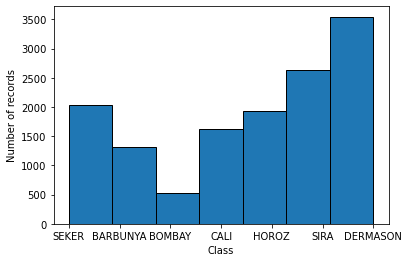

In [4]:
plt.hist(data["Class"], bins = 7, edgecolor = "black")
plt.xlabel("Class")
plt.ylabel("Number of records")

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, stratify = Y)  

In [40]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 8)

In [41]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [42]:
Y_predictions = clf.predict(X_test)
Y_train_predictions = clf.predict (X_train)

In [43]:
cm1 = confusion_matrix(Y_predictions, Y_test)
cm2 = confusion_matrix(Y_train_predictions, Y_train)

In [44]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [45]:
accuracy(cm2)

0.8717329694552325

In [46]:
accuracy(cm1)

0.864103819784525

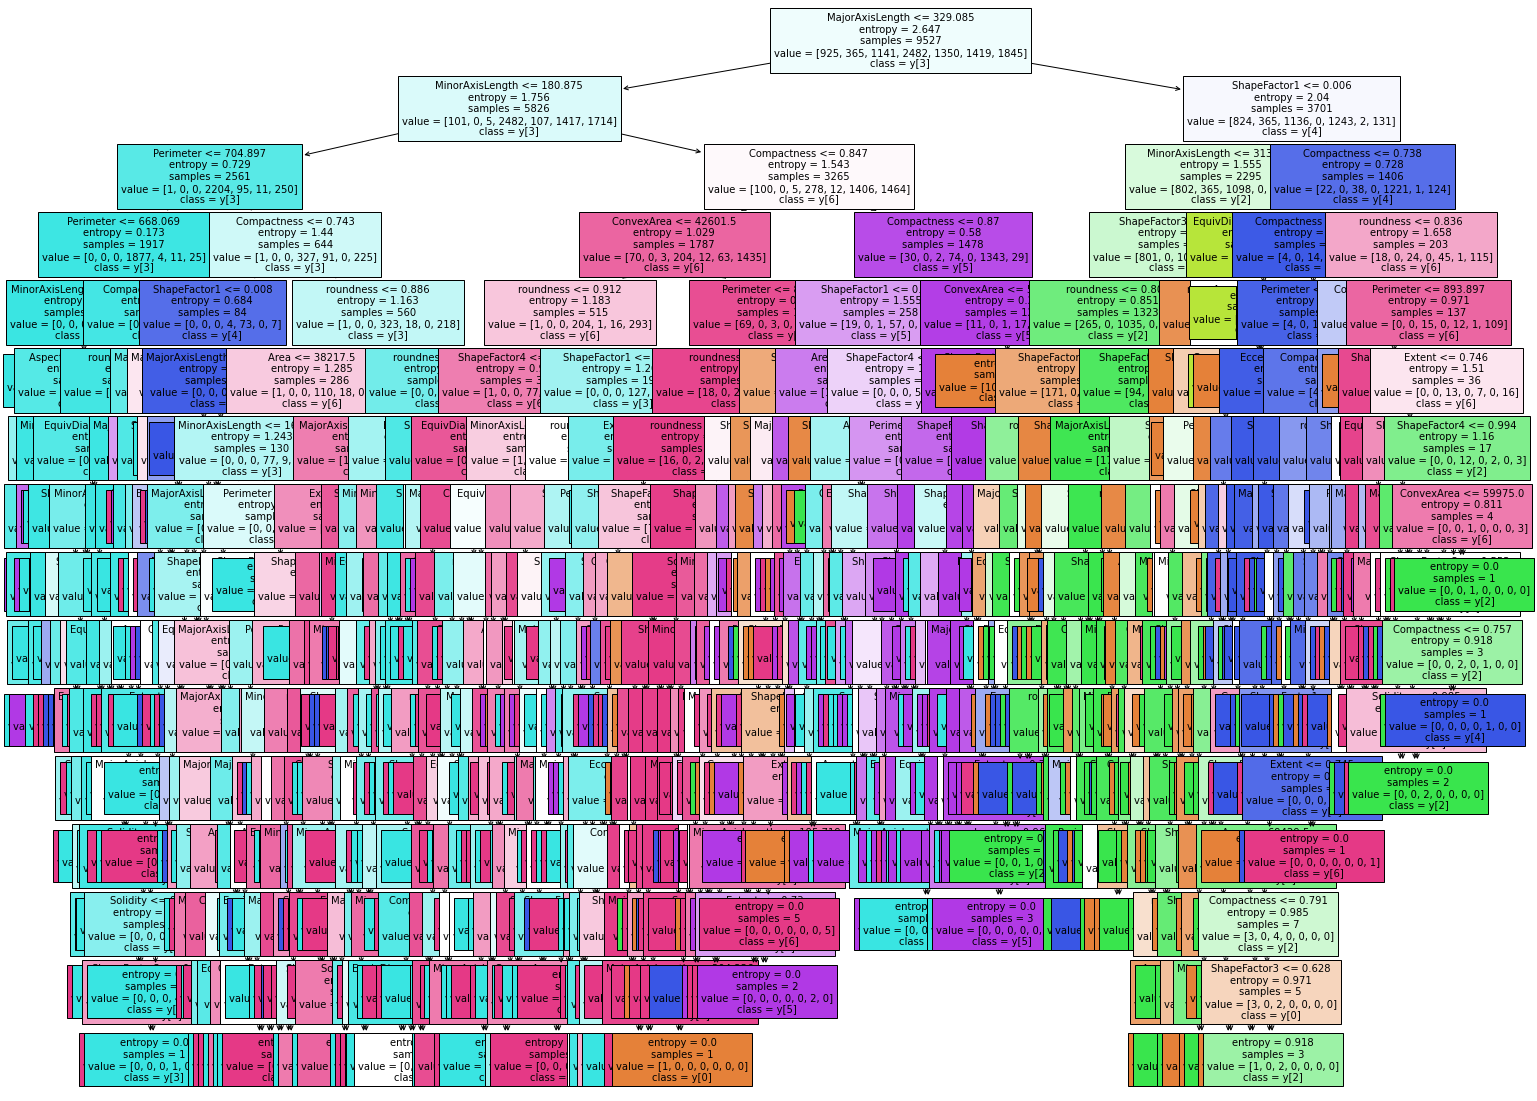

In [32]:
plt.figure(figsize=(25,20))
tree.plot_tree(clf, filled=True, fontsize=10, max_depth= None,feature_names = list(X.columns), class_names = True)
plt.show()
#maximum and minumum (depth of 7, what happens to the accuracy of the testing data == overfitting)

In [55]:
# Changing number of max features to 3, Accuracy slightly increases
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, stratify = Y)  
clf = tree.DecisionTreeClassifier(criterion='entropy', max_features = 3)
clf.fit(X_train, Y_train)
Y_predictions = clf.predict(X_test)
cm = confusion_matrix(Y_predictions, Y_test)
accuracy(cm)

0.883692458374143

In [56]:
# Changing number of max features to 5, Accuracy slightly increases even more
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, stratify = Y)  
clf = tree.DecisionTreeClassifier(criterion='entropy', max_features = 5)
clf.fit(X_train, Y_train)
Y_predictions = clf.predict(X_test)
cm = confusion_matrix(Y_predictions, Y_test)
accuracy(cm)

0.8890793339862879

In [57]:
# Changing number of max features to 7, Accuracy increases
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, stratify = Y)  
clf = tree.DecisionTreeClassifier(criterion='entropy', max_features = 7)
clf.fit(X_train, Y_train)
Y_predictions = clf.predict(X_test)
cm = confusion_matrix(Y_predictions, Y_test)
accuracy(cm)

0.8952007835455436

In [58]:
# Changing number of max features to 15, Accuracy increases
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, stratify = Y)  
clf = tree.DecisionTreeClassifier(criterion='entropy', max_features = 15)
clf.fit(X_train, Y_train)
Y_predictions = clf.predict(X_test)
cm = confusion_matrix(Y_predictions, Y_test)
accuracy(cm)

0.8981390793339863

Clearly having max features at 3 is under fitting while having max features equal to 100 is overfitting
After trials we realize that having max features at around 25 is optimum and gives the best results (accuracy = 0.9)